<a href="https://colab.research.google.com/github/Gilmar1987/Estatistica_1VA/blob/main/ProjetoIA_2VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Imports
!pip install fancyimpute

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate


from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder




Lê um conjunto de dados de um arquivo CSV.

In [55]:
df= pd.read_csv('/content/drive/MyDrive/ObesityDataSet_Backup.csv')

Mapeia valores categóricos para valores numéricos em determinadas colunas do DataFrame.
ex: 'yes' = 1.0 e 'no' = 0.0

In [56]:
# Mapeia valores categóricos para valores numéricos em determinadas colunas do DataFrame.
columns_to_map = {
    'Gender': {'Female': 1.0, 'Male': 0.0},
    'family_history_with_overweight': {'yes': 1.0, 'no': 0.0},
    'FAVC': {'yes': 1.0, 'no': 0.0},
    'SMOKE': {'yes': 1.0, 'no': 0.0},
    'SCC': {'yes': 1.0, 'no': 0.0},
    'CAEC': {'no': 0.0, 'Always': 1.0, 'Frequently': 2.0, 'Sometimes': 3.0},
    'CALC': {'no': 0.0, 'Frequently': 1.0, 'Sometimes': 2.0},
    'MTRANS': {'Public_Transportation': 0.0, 'Walking': 1.0, 'Automobile': 2.0, 'Bike': 3.0},
    'NObeyesdad': {'Normal_Weight': 0.0, 'Overweight_Level_I': 1.0, 'Overweight_Level_II': 2.0,
                   'Overweight_Level_III': 3.0, 'Insufficient_Weight': 4.0, 'Obesity_Type_I': 5.0,
                   'Obesity_Type_II': 6.0, 'Obesity_Type_III': 7.0}
}

for column, mapping in columns_to_map.items():
    df[column] = df[column].map(mapping)

Cria um gráfico de barras para visualizar a quantidade de dados ausentes em cada variável.

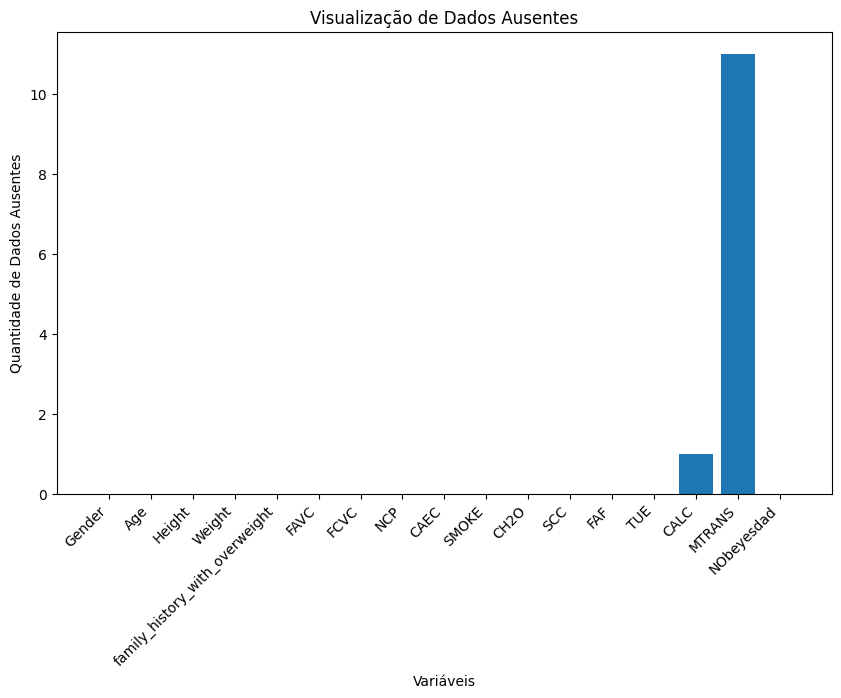

In [57]:
# Crie um gráfico de barras para mostrar dados ausentes
plt.figure(figsize=(10, 6))
plt.bar(df.columns, df.isnull().sum())
plt.xlabel('Variáveis')
plt.ylabel('Quantidade de Dados Ausentes')
plt.title('Visualização de Dados Ausentes')
plt.xticks(rotation=45, ha="right")
plt.show()

Cria uma cópia do DataFrame.

In [58]:
# Cria uma cópia do DataFrame.
df = df.copy()


# Padroniza as variáveis numéricas usando StandardScaler.
scaler = StandardScaler()
numeric_cols = ['Age', 'Height', 'Weight', ]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Mapeamento das colunas para verificar novamente dados ausentes
# Preenche valores nulos nas colunas 'CALC' e 'MTRANS' com as médias.
df['CALC'].fillna(df['CALC'].mean(), inplace=True)
df['MTRANS'].fillna(df['MTRANS'].mean(), inplace=True)

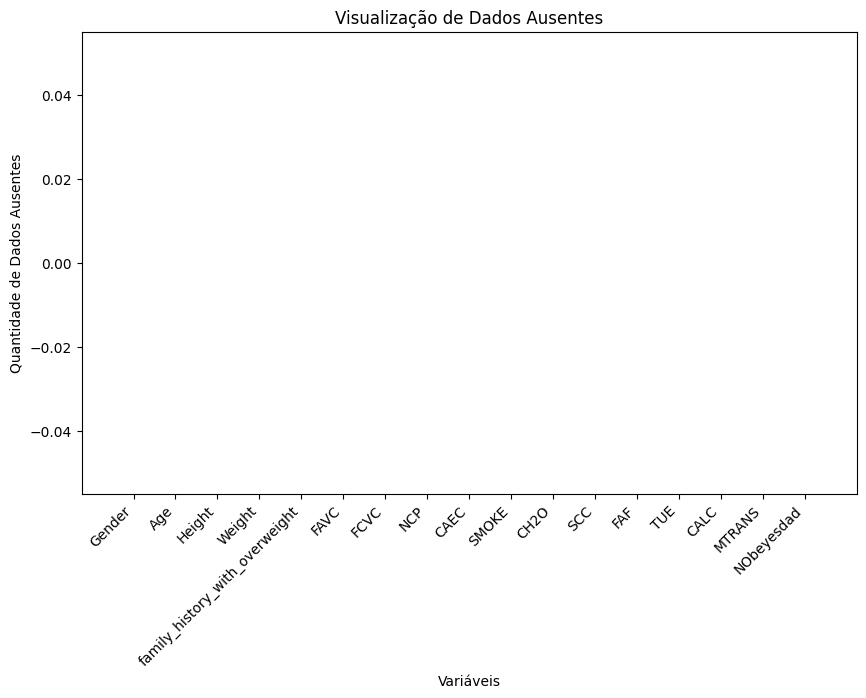

In [59]:
# Crie um gráfico de barras para mostrar dados ausentes
plt.figure(figsize=(10, 6))
plt.bar(df.columns, df.isnull().sum())
plt.xlabel('Variáveis')
plt.ylabel('Quantidade de Dados Ausentes')
plt.title('Visualização de Dados Ausentes')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
print(df)

In [60]:
# Verificar o nome de todas as colunas
nomes_colunas = df.columns
print(nomes_colunas)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


Divide o conjunto de dados em conjuntos de treino e teste.

In [61]:
# Separar o conjunto de dados em características (X) e rótulos (Y)

# Fixando a semente para reprodutibilidade
random_state = 42

X = df.drop('NObeyesdad', axis=1)  # Todas as colunas, exceto 'NObeyesdad'
Y = df['NObeyesdad'] # Apenas a coluna  'NObeyesdad'

# Separação em conjuntos de treino e teste
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [62]:
# Parâmetros do número de folds que o conjunto de dados será divido
num_folds = 5


# Scoring que será avaliado com as métricas ...
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']



Define uma lista de modelos a serem avaliados.

In [63]:
# Criação dos modelos de classificação que seram avaliados
from sklearn.neural_network import MLPClassifier
models = []
models.append(("LR", LogisticRegression(solver="liblinear" )))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("NN", MLPClassifier(max_iter=1000,  random_state=random_state)))  #  Rede Neural que por padrão tem uma camada oculta com 100 neuronios

Avalia cada modelo usando validação cruzada e imprime suas métricas de desempenho.

In [64]:
# Use LabelEncoder para converter rótulos categóricos em inteiros
#label_encoder = LabelEncoder()
#Y_train_encoded = label_encoder.fit_transform(Y_train)
from sklearn.model_selection import train_test_split

# Use LabelEncoder para converter rótulos categóricos em inteiros
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Avaliação dos modelos
results = []
names = []
fold_times = []

for name, model in models:
    start_time = time.time()
    kfold = KFold(n_splits=num_folds, random_state=random_state, shuffle=True)
    cv_results = cross_validate(model, X_train, Y_train_encoded, cv=kfold, scoring=scoring)
    end_time = time.time()
    elapsed_time = end_time - start_time
    fold_times.append(elapsed_time)
    results.append(cv_results)
    names.append(name)

        # Exibindo a média das métricas "'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'"
    msg = f"{name} - "
    for metric in scoring:
            msg += f"{metric}: {cv_results['test_' + metric].mean():.4f}   "
            msg += f"Tempo de Execução: {elapsed_time:.4f}segundos  "
    print(msg)




LR - accuracy: 0.7387   Tempo de Execução: 0.1184segundos  precision_macro: 0.7286   Tempo de Execução: 0.1184segundos  recall_macro: 0.7328   Tempo de Execução: 0.1184segundos  f1_macro: 0.7220   Tempo de Execução: 0.1184segundos  
KNN - accuracy: 0.8519   Tempo de Execução: 0.1254segundos  precision_macro: 0.8484   Tempo de Execução: 0.1254segundos  recall_macro: 0.8456   Tempo de Execução: 0.1254segundos  f1_macro: 0.8367   Tempo de Execução: 0.1254segundos  
CART - accuracy: 0.9200   Tempo de Execução: 0.0539segundos  precision_macro: 0.9190   Tempo de Execução: 0.0539segundos  recall_macro: 0.9173   Tempo de Execução: 0.0539segundos  f1_macro: 0.9170   Tempo de Execução: 0.0539segundos  
NB - accuracy: 0.5628   Tempo de Execução: 0.0331segundos  precision_macro: 0.5960   Tempo de Execução: 0.0331segundos  recall_macro: 0.5511   Tempo de Execução: 0.0331segundos  f1_macro: 0.5200   Tempo de Execução: 0.0331segundos  
SVM - accuracy: 0.8922   Tempo de Execução: 0.2966segundos  preci

Cria um DataFrame com os resultados de desempenho dos modelos.

Accuracy (Acurácia):

Fórmula: (TP + TN) / (TP + TN + FP + FN)
Mede a proporção de previsões corretas em relação ao total de previsões.
Precision (Precisão):

Fórmula: TP / (TP + FP)
Indica a proporção de instâncias positivas corretamente identificadas em relação ao total de instâncias identificadas como positivas.
Recall (Revocação):

Fórmula: TP / (TP + FN)
Representa a proporção de instâncias positivas corretamente identificadas em relação ao total de instâncias positivas.
F1 Score (Pontuação F1):

Fórmula: 2 * (Precision * Recall) / (Precision + Recall)
É a média harmônica entre precisão e recall. Fornece um equilíbrio entre as duas métricas e é útil quando há desequilíbrio entre as classes.


Resultados de Acurácia:
         LR       KNN      CART        NB       SVM        NN
0  0.754438  0.831361  0.920118  0.594675  0.884615  0.937870
1  0.742604  0.849112  0.899408  0.559172  0.875740  0.937870
2  0.748521  0.863905  0.943787  0.579882  0.914201  0.949704
3  0.694362  0.842730  0.931751  0.454006  0.872404  0.943620
4  0.753709  0.872404  0.937685  0.626113  0.913947  0.982196


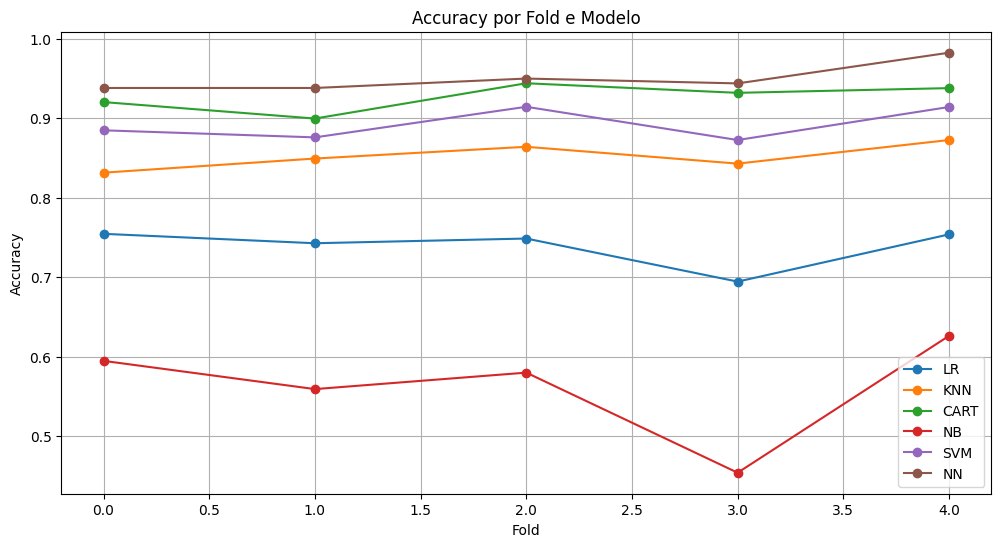

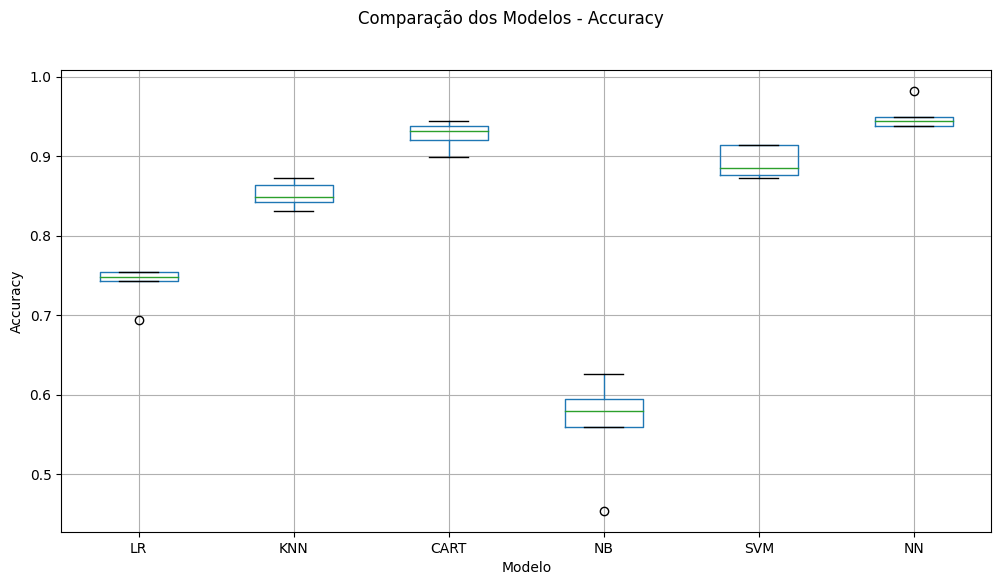

In [47]:
#import pandas as pd


# Criando um dataframe para armazenar a métrica de acurácia em cada fold
accuracy_df = pd.DataFrame()

for name, model_results in zip(names, results):
    accuracy_series = pd.Series(model_results['test_accuracy'], name=name)
    accuracy_df = pd.concat([accuracy_df, accuracy_series], axis=1)

# Exibindo o dataframe de acurácia
print("\nResultados de Acurácia:")
print(accuracy_df)


# Plotando um gráfico de linhas com base no DataFrame de acurácia

plt.figure(figsize=(12, 6))

for model in accuracy_df.columns:
    plt.plot(accuracy_df[model], marker='o', label=model)

plt.title('Accuracy por Fold e Modelo')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




# Plotando um gráfico de boxplot com base no DataFrame de acurácia para avaliar os modelos
# com base na métrica ACCURACY

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Comparação dos Modelos - Accuracy")

accuracy_df.boxplot(ax=ax)
ax.set_xlabel('Modelo')
ax.set_ylabel('Accuracy')

plt.show()

In [48]:

# Criando um dataframe para armazenar os resultados das Métricas em cada Fold...

df_results = pd.DataFrame()

for name, model_results in zip(names, results):
    model_df = pd.DataFrame(model_results)
    model_df = model_df.rename(columns=lambda x: f"{name}_{x}")
    df_results = pd.concat([df_results, model_df], axis=1)

# Exibindo o dataframe
print("\nResultados completos:")
print(df_results)



Resultados completos:
   LR_fit_time  LR_score_time  LR_test_accuracy  LR_test_precision_macro  \
0     0.020582       0.004497          0.754438                 0.749336   
1     0.019086       0.004754          0.742604                 0.724217   
2     0.018861       0.004485          0.748521                 0.746373   
3     0.019572       0.004280          0.694362                 0.688994   
4     0.019653       0.004337          0.753709                 0.734306   

   LR_test_recall_macro  LR_test_f1_macro  KNN_fit_time  KNN_score_time  \
0              0.753621          0.742181      0.001509        0.021750   
1              0.738420          0.724866      0.001791        0.021210   
2              0.734978          0.725352      0.001865        0.019420   
3              0.700713          0.690552      0.001756        0.019424   
4              0.736483          0.726876      0.001719        0.020809   

   KNN_test_accuracy  KNN_test_precision_macro  ...  SVM_test_accurac

In [49]:


#  Etapa que permite visualizar como cada label original "saída" foi mapeada para um valor numérico.

# Importa a classe LabelEncoder do módulo sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplica a codificação às labels de treinamento (Y_train)
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Imprime as labels codificadas
print(Y_train_encoded)



[4 5 2 ... 3 4 0]


In [50]:
# Ajuste do algoritimo KNN para alcançar o melhor resultado

np.random.seed(7)  # Definindo uma semente global

# Tuning do KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
num_folds = 5  # Número de folds para a validação cruzada (cross-validation)

# Configurando o objeto KFold para dividir os dados em 10 folds
kfold = KFold(n_splits=num_folds)

scoring = 'accuracy'  # Métrica de avaliação utilizada (pode ser ajustada conforme necessário)

# Configurando a grade de hiperparâmetros para busca
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Ajustando o modelo usando a validação cruzada e a busca em grade
grid_result = grid.fit(rescaledX, Y_train)

# Imprimindo o melhor resultado e os hiperparâmetros correspondentes
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# Extraindo resultados para cada combinação de hiperparâmetros testada
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Iterando sobre os resultados e imprimindo-os
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))


Melhor: 0.873829 usando {'metric': 'manhattan', 'n_neighbors': 1}
0.831180 (0.023628): {'metric': 'euclidean', 'n_neighbors': 1}
0.813994 (0.021909): {'metric': 'euclidean', 'n_neighbors': 3}
0.799177 (0.011339): {'metric': 'euclidean', 'n_neighbors': 5}
0.783783 (0.012300): {'metric': 'euclidean', 'n_neighbors': 7}
0.772516 (0.003671): {'metric': 'euclidean', 'n_neighbors': 9}
0.763040 (0.006512): {'metric': 'euclidean', 'n_neighbors': 11}
0.747041 (0.009576): {'metric': 'euclidean', 'n_neighbors': 13}
0.736971 (0.012119): {'metric': 'euclidean', 'n_neighbors': 15}
0.735787 (0.012802): {'metric': 'euclidean', 'n_neighbors': 17}
0.722160 (0.007671): {'metric': 'euclidean', 'n_neighbors': 19}
0.715046 (0.013467): {'metric': 'euclidean', 'n_neighbors': 21}
0.873829 (0.017123): {'metric': 'manhattan', 'n_neighbors': 1}
0.866713 (0.013570): {'metric': 'manhattan', 'n_neighbors': 3}
0.862574 (0.017817): {'metric': 'manhattan', 'n_neighbors': 5}
0.851302 (0.014683): {'metric': 'manhattan', '

Esta linha indica que a melhor precisão (accuracy) atingida durante a busca em grade foi de aproximadamente 87.98%. Os melhores hiperparâmetros encontrados são metric='manhattan' e n_neighbors=1.

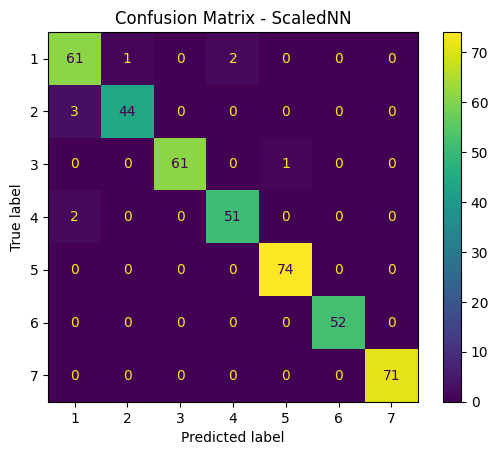

Accuracy: 0.9787234042553191
Precision: 0.9790080473768417
Recall: 0.9787234042553191
F1 Score: 0.9787644228480296
AUC-ROC: 0.9990717489715026


In [51]:
# Treinamento do modelo de Rede Neural (NN)
# Com duas camadas ocultas 50 e 25
import sklearn.neural_network
scaled_nn_model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50, 25))

# Treinamento do modelo de Rede Neural (NN)

#scaled_nn_model = MLPClassifier(max_iter=1000)


scaled_nn_model.fit(X_train, Y_train)

# Obtendo as previsões
scaled_nn_predictions = scaled_nn_model.predict(X_test)

# Matriz de confusão para ScaledNN
scaled_nn_cm = confusion_matrix(Y_test, scaled_nn_predictions)
labels = [str(i) for i in range(1, 8)]  # Rótulos das classes
cmd_scaled_nn = ConfusionMatrixDisplay(scaled_nn_cm, display_labels=labels)
cmd_scaled_nn.plot(values_format="d")
plt.title("Confusion Matrix - ScaledNN")
plt.show()


# Outras métricas
accuracy = accuracy_score(Y_test, scaled_nn_predictions)
precision = precision_score(Y_test, scaled_nn_predictions, average='weighted')
recall = recall_score(Y_test, scaled_nn_predictions, average='weighted')
f1 = f1_score(Y_test, scaled_nn_predictions, average='weighted')
roc_auc = roc_auc_score(Y_test, scaled_nn_model.predict_proba(X_test), multi_class='ovr', average='weighted')

# Exibição das métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
